# Import library

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 

# Load Dataset

In [2]:
IMAGE_SIZE = 264
CHANNELS = 3
BATCH_SIZE = 32

In [3]:

train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train/',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse",
)

Found 2268 images belonging to 4 classes.


In [4]:
train_generator.class_indices

{'Benign': 0,
 '[Malignant] Pre-B': 1,
 '[Malignant] Pro-B': 2,
 '[Malignant] early Pre-B': 3}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.55598366 0.65361774 0.8278562 ]
  [0.55635995 0.6524889  0.8293613 ]
  [0.55673623 0.65136003 0.8308664 ]
  ...
  [0.49272484 0.4238224  0.9476268 ]
  [0.50855947 0.4318501  0.9481586 ]
  [0.516768   0.45659143 0.94597715]]

 [[0.5598293  0.6696332  0.82085234]
  [0.556819   0.66662294 0.8185947 ]
  [0.55380887 0.6636128  0.81633705]
  ...
  [0.491596   0.42194104 0.94649804]
  [0.5108171  0.43335524 0.9485349 ]
  [0.51714426 0.45922536 0.9456009 ]]

 [[0.59442866 0.7017039  0.8417444 ]
  [0.58991337 0.6983174  0.84061563]
  [0.5853981  0.694931   0.8394868 ]
  ...
  [0.49046716 0.42005968 0.9453692 ]
  [0.51307476 0.43486032 0.94891125]
  [0.51752055 0.46185932 0.94522464]]

 ...

 [[0.7991142  0.7634405  0.98051876]
  [0.7716814  0.7246226  0.9840969 ]
  [0.740544   0.6931237  0.97692245]
  ...
  [0.63692063 0.64093256 0.99233764]
  [0.6436936  0.6480818  0.9930902 ]
  [0.65046656 0.655231   0.9938427 ]]

 [[0.7964803  0.7596777  0.98089504]
  [0.7686712  0.7216124  0.9833443 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 647 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="sparse"
)

Found 327 images belonging to 4 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.8218521  0.8504252  0.88066405]
  [0.8216585  0.85013473 0.8811481 ]
  [0.82146484 0.84984434 0.88163215]
  ...
  [0.8700259  0.871708   0.88291025]
  [0.86666673 0.87899023 0.87843144]
  [0.8610678  0.87115514 0.8672336 ]]

 [[0.82745105 0.85994446 0.8711504 ]
  [0.82745105 0.85984766 0.8707631 ]
  [0.82745105 0.85975087 0.87037593]
  ...
  [0.8697354  0.8716112  0.88252306]
  [0.86666673 0.8792807  0.87843144]
  [0.8608742  0.87076795 0.8668463 ]]

 [[0.82745105 0.86050576 0.8812333 ]
  [0.82745105 0.86069936 0.88133013]
  [0.82745105 0.86089295 0.8814269 ]
  ...
  [0.869445   0.8715144  0.88213587]
  [0.86666673 0.8795711  0.87843144]
  [0.8606805  0.8703807  0.86645913]]

 ...

 [[0.886067   0.909804   0.9342619 ]
  [0.8961847  0.90887666 0.9381823 ]
  [0.89019614 0.9068085  0.9374721 ]
  ...
  [0.90125185 0.9245641  0.9471675 ]
  [0.9007679  0.9244674  0.94697386]
  [0.9002839  0.9243705  0.94678026]]

 [[0.8864542  0.909804   0.93435866]
  [0.8959911  0.9087799  0.93827903]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 262, 262, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 131, 131, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 129, 129, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 64)        0

### Compiling the Model

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
2592/32

81.0

In [14]:
322/32

10.0625

In [15]:
history = model.fit(
    train_generator,
    batch_size=32,
    steps_per_epoch =50,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=30,
)

Epoch 1/30
50/50 [==============================] - 79s 2s/step - loss: 1.3035 - accuracy: 0.3596 - val_loss: 1.0610 - val_accuracy: 0.5521
Epoch 2/30
50/50 [==============================] - 66s 1s/step - loss: 0.7377 - accuracy: 0.7368 - val_loss: 0.6527 - val_accuracy: 0.7552
Epoch 3/30
50/50 [==============================] - 62s 1s/step - loss: 0.5403 - accuracy: 0.7912 - val_loss: 0.6009 - val_accuracy: 0.7344
Epoch 4/30
50/50 [==============================] - 60s 1s/step - loss: 0.5320 - accuracy: 0.7914 - val_loss: 0.3160 - val_accuracy: 0.8906
Epoch 5/30
50/50 [==============================] - 60s 1s/step - loss: 0.4058 - accuracy: 0.8521 - val_loss: 0.5279 - val_accuracy: 0.7969
Epoch 6/30
50/50 [==============================] - 58s 1s/step - loss: 0.4025 - accuracy: 0.8465 - val_loss: 0.3970 - val_accuracy: 0.8646
Epoch 7/30
50/50 [==============================] - 59s 1s/step - loss: 0.4021 - accuracy: 0.8409 - val_loss: 0.3975 - val_accuracy: 0.8698
Epoch 8/30
50/50 [==

In [16]:
scores = model.evaluate(test_generator)

11/11 [==============================] - 10s 939ms/step - loss: 0.1662 - accuracy: 0.9358


In [17]:
scores

[0.16622468829154968, 0.9357798099517822]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 50}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

30

In [24]:
history.history['loss'][:30] # show loss for first 5 epochs

[1.3034579753875732,
 0.7376980781555176,
 0.5402569770812988,
 0.5319962501525879,
 0.4058167636394501,
 0.4025095999240875,
 0.4021333158016205,
 0.3717764914035797,
 0.321133553981781,
 0.2795175611972809,
 0.2759968042373657,
 0.25265568494796753,
 0.24953921139240265,
 0.28970760107040405,
 0.2221938520669937,
 0.24025455117225647,
 0.2650885581970215,
 0.18042024970054626,
 0.1827007681131363,
 0.17838118970394135,
 0.21669107675552368,
 0.21399013698101044,
 0.1883227378129959,
 0.17634670436382294,
 0.1768079400062561,
 0.14776799082756042,
 0.22956305742263794,
 0.14611436426639557,
 0.14317980408668518,
 0.1345963031053543]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.5520833134651184,
 0.7552083134651184,
 0.734375,
 0.890625,
 0.796875,
 0.8645833134651184,
 0.8697916865348816,
 0.84375,
 0.9270833134651184,
 0.875,
 0.8958333134651184,
 0.875,
 0.890625,
 0.890625,
 0.8020833134651184,
 0.890625,
 0.9166666865348816,
 0.9479166865348816,
 0.9322916865348816,
 0.90625,
 0.953125,
 0.9114583134651184,
 0.921875,
 0.9270833134651184,
 0.9270833134651184,
 0.8229166865348816,
 0.9375,
 0.9166666865348816,
 0.9270833134651184,
 0.9375]

In [27]:
acc

[0.359649121761322,
 0.7368420958518982,
 0.7912499904632568,
 0.7913534045219421,
 0.8521303534507751,
 0.8464912176132202,
 0.8408521413803101,
 0.8656250238418579,
 0.8746867179870605,
 0.8884711861610413,
 0.8959899544715881,
 0.9060150384902954,
 0.9097744226455688,
 0.8918750286102295,
 0.9179198145866394,
 0.9197995066642761,
 0.8991228342056274,
 0.9385964870452881,
 0.9317042827606201,
 0.9335839748382568,
 0.9179198145866394,
 0.9097744226455688,
 0.9298245906829834,
 0.934374988079071,
 0.9356250166893005,
 0.9454887509346008,
 0.9135338068008423,
 0.9454887509346008,
 0.9474999904632568,
 0.9493749737739563]

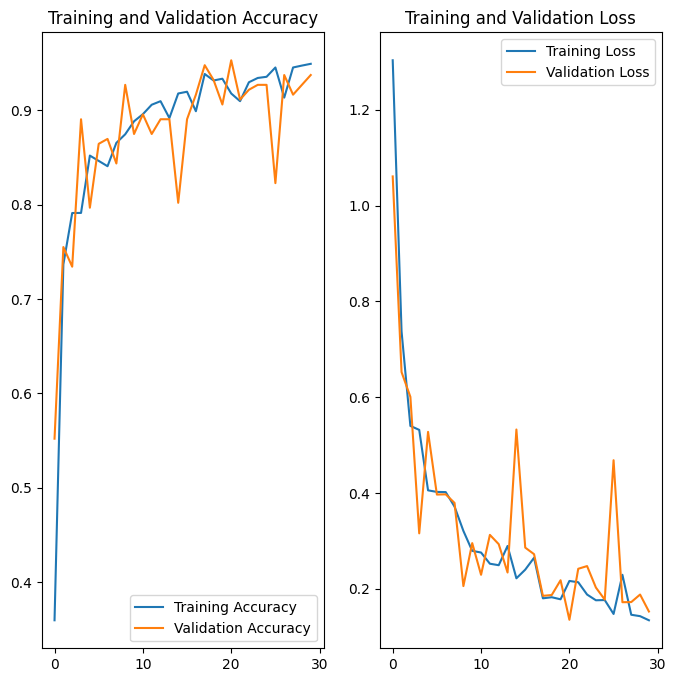

In [28]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS)[:30],acc[:30], label='Training Accuracy')
plt.plot(range(EPOCHS)[:30],val_acc[:30], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS)[:30],loss[:30], label='Training Loss')
plt.plot(range(EPOCHS)[:30], val_loss[:30], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: [Malignant] Pro-B
1/1 [==============================] - 0s 289ms/step
predicted label: [Malignant] Pro-B


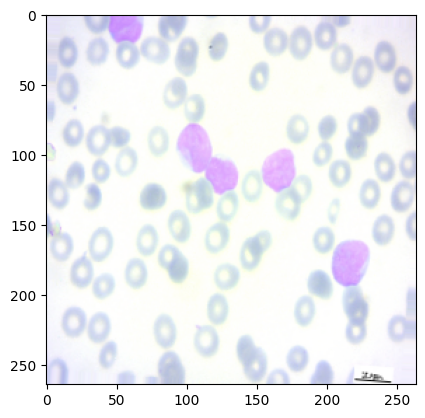

In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 22ms/step


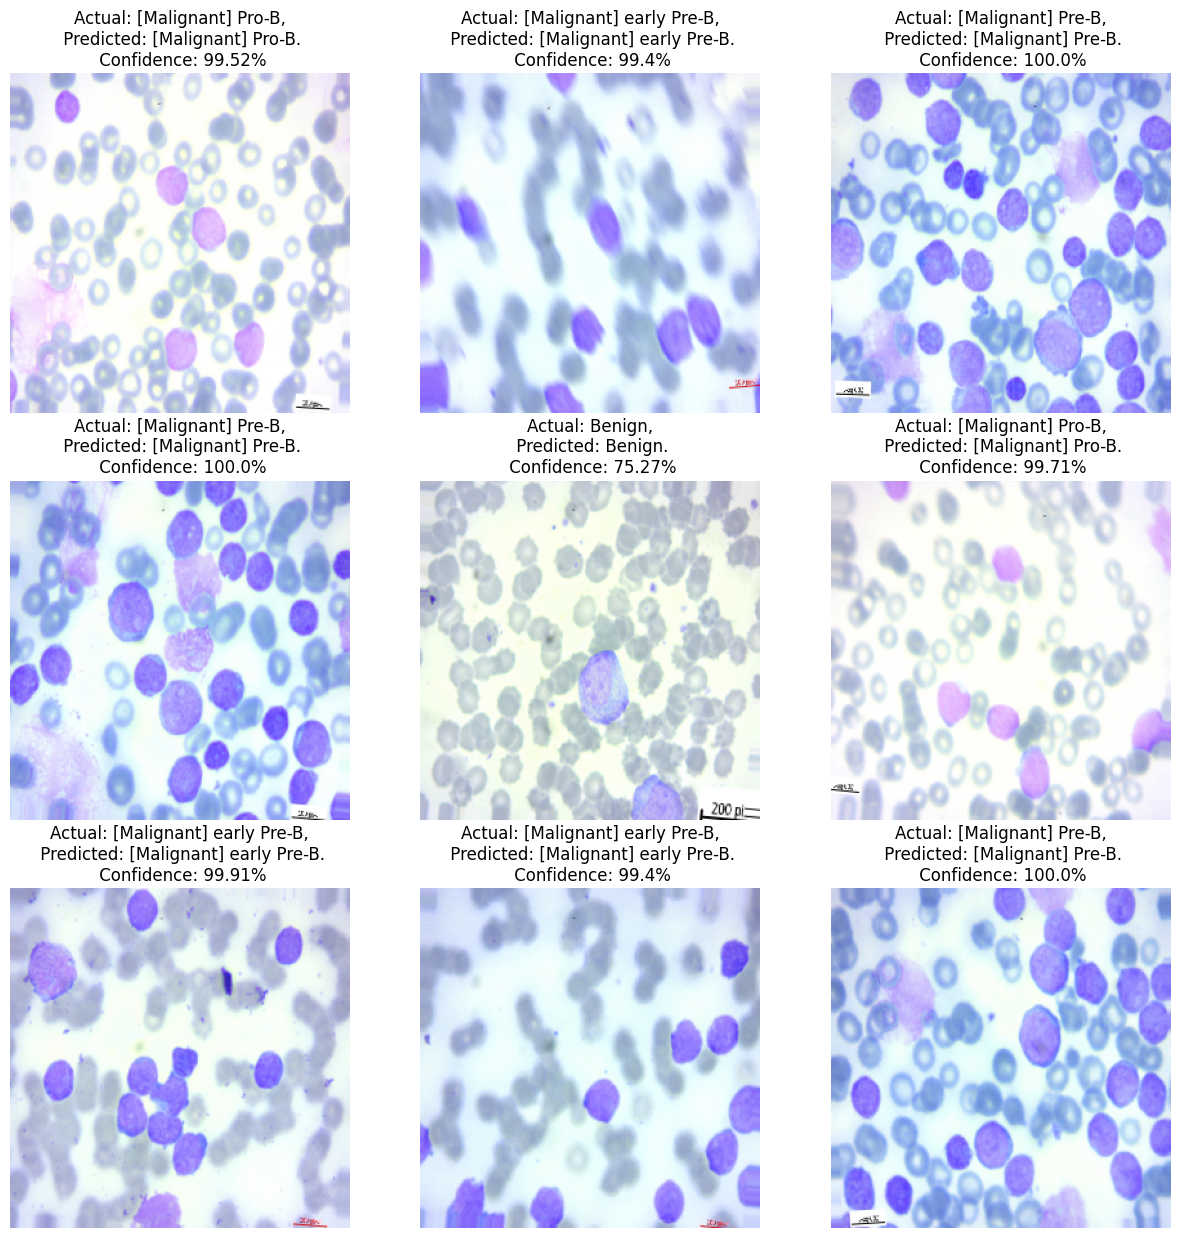

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [32]:
model.save("../leukemia.h5")

C:\Users\shadm\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
